# Analyzing the results from the survey of data generators and consumers about the usage and usefulness of the different dataset documentation approaches

Before using add the "survey-results.xlsx" file in the "inputs" folder (see the README for details)

## Import required packages and set plot settings

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set(
    font="Franklin Gothic Book",
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "lightgrey",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "dimgrey",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "dimgrey",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)
sns.set_context(
    "notebook", rc={"font.size": 16, "axes.titlesize": 20, "axes.labelsize": 18}
)

colors = ["#073b4c", "#ffd166", "#06d6a0", "#118ab2", "#ef476f", "#fb5607"]
patterns = ["/", "\\", "-", "+", "x", "o", "O", ".", "*", "|"]
markers = ["o", "s", "D", "^", "v", "*", "X", "+", "p", "h"]

## Load data

In [3]:
df = pd.read_excel("inputs/dataset/primary/survey-results.xlsx")

## Number of participants

In [4]:
# separate the row with questions
df_questions = df.iloc[0]
df_responses = df.iloc[1:].reset_index(drop=True)

# count
total = len(df_responses)
notsuitable = len(df_responses[df_responses["Q15"].str.contains("Neither")])
df_responses = df_responses.drop(
    df_responses[df_responses["Q15"].str.contains("Neither")].index
)

notcompleted = len(df_responses[df_responses["Finished"].str.contains("False")])
df_responses = df_responses.drop(
    df_responses[df_responses["Finished"].str.contains("False")].index
)

completed = total - notsuitable - notcompleted
print("A total of", total, "people participated in the survey.")
print(
    "Of them",
    notsuitable,
    "did not identify as either data generators or consumers so they did not complete the survey,",
)
print(
    "and",
    notcompleted,
    "did not complete the survey fully.",
)
print(
    "We only analyzed responses from the",
    completed,
    "participants who completed the survey.",
)

A total of 33 people participated in the survey.
Of them 2 did not identify as either data generators or consumers so they did not complete the survey,
and 2 did not complete the survey fully.
We only analyzed responses from the 29 participants who completed the survey.


## Profile of survey participants

In [5]:
roleid = "Q15"
role_options = list(set(list(df_responses[roleid].values)))
role_starts = ["I am a data generator", "I am a data consumer", "I am both"]
role_options_arranged = []
for start in role_starts:
    for option in role_options:
        if option.startswith(start):
            role_options_arranged.append(option)
role_options = role_options_arranged
print(role_options)
role_labels = ["Data generator", "Data consumer", "Both"]
row = ["Total", ""]
for i in range(len(role_options)):
    count = len(df_responses[df_responses[roleid] == role_options[i]])
    row.append(count)
    print(role_labels[i], count, round(count / completed * 100, 1), "%")

['I am a data generator: I collect, help collect, manage, and/or help manage clinical research data', 'I am a data consumer: I use clinical research data for developing AI/ML models and/or prepare/curate data for that purpose', 'I am both a data generator and data consumer (Note: The survey might take more time as you will be asked to answer questions from both point of views)']
Data generator 5 17.2 %
Data consumer 14 48.3 %
Both 10 34.5 %


In [6]:
role_labels = role_labels + ["Total"]
profile_list = []
row = ["Total", ""]
for i in range(len(role_options)):
    count = len(df_responses[df_responses[roleid] == role_options[i]])
    row.append(count)
row.append(len(df_responses))
profile_list.append(row)
questionids = ["Q13", "Q260", "Q39", "Q40"]
question_labels = [
    "Level of education",
    "Affiliation type",
    "Position",
    "Experience at current position",
]

for i in range(len(questionids)):
    options = list(set(list(df_responses[questionids[i]].values)))
    for option in options:
        row = [question_labels[i], option]
        for role in role_options:
            count = len(
                df_responses[
                    (df_responses[questionids[i]] == option)
                    & (df_responses[roleid] == role)
                ]
            )
            row.append(count)
        row.append(len(df_responses[df_responses[questionids[i]] == option]))
        profile_list.append(row)
df_profile = pd.DataFrame(profile_list, columns=["Category", "Option"] + role_labels)
df_profile["Total (%)"] = round(df_profile["Total"] / completed * 100, 1)
display(df_profile)
df_profile.to_excel("outputs/survey_profiles.xlsx", index=False)

,Category,Option,Data generator,Data consumer,Both,Total,Total (%)
0,Total,,5,14,10,29,100.0
1,Level of education,"Graduate or professional degree (MA, MS, MBA, ...",4,10,10,24,82.8
2,Level of education,Bachelor’s degree,0,4,0,4,13.8
3,Level of education,Other (please specify below),1,0,0,1,3.4
4,Affiliation type,Government,0,1,0,1,3.4
5,Affiliation type,Industry,1,1,0,2,6.9
6,Affiliation type,Academia,4,12,10,26,89.7
7,Position,Other (please specify below),0,1,1,2,6.9
8,Position,Postdoc,1,2,1,4,13.8
9,Position,Undergraduate student,1,0,0,1,3.4


## Knowledge and prior-use of dataset documentations

In [7]:
questionids = ["Q44", "Q46"]
doc_options = [
    "Datasheet",
    "Data nutrition label",
    "Accountability documentation",
    "Healthsheet",
    "Data card",
    "None of the above",
]
doc_option_labels = [
    "Datasheet",
    "Dataset Nutrition Label",
    "Accountability Documentation",
    "Healthsheet",
    "Data Card",
    "None of the above",
]
labels_list = ["Have heard about", "Have prepared/used"]
dict_df = {}
for i in range(len(questionids)):
    full_list = []
    full_list2 = []
    for j in range(len(doc_options)):
        row = [doc_option_labels[j]]
        row2 = [doc_option_labels[j]]
        for role in role_options:
            count = len(
                df_responses[
                    (df_responses[questionids[i]].str.contains(doc_options[j]))
                    & (df_responses[roleid] == role)
                ]
            )
            row.append(count)
            row2.append(count / completed * 100)
        row.append(
            len(df_responses[df_responses[questionids[i]].str.contains(doc_options[j])])
        )
        row2.append(
            len(df_responses[df_responses[questionids[i]].str.contains(doc_options[j])])
            / completed
            * 100
        )
        full_list.append(row)
        full_list2.append(row2)
    df_k = pd.DataFrame(full_list, columns=["Option"] + role_labels)
    df_k2 = pd.DataFrame(full_list2, columns=["Option"] + role_labels)
    dict_df[labels_list[i]] = df_k
    dict_df[labels_list[i] + " %"] = df_k2
    print(labels_list[i])
    display(df_k)
    display(df_k2)

Have heard about


,Option,Data generator,Data consumer,Both,Total
0,Datasheet,5,11,10,26
1,Dataset Nutrition Label,3,2,2,7
2,Accountability Documentation,2,1,3,6
3,Healthsheet,5,5,7,17
4,Data Card,4,3,5,12
5,None of the above,0,3,1,4


,Option,Data generator,Data consumer,Both,Total
0,Datasheet,17.241379,37.931034,34.482759,89.655172
1,Dataset Nutrition Label,10.344828,6.896552,6.896552,24.137931
2,Accountability Documentation,6.896552,3.448276,10.344828,20.689655
3,Healthsheet,17.241379,17.241379,24.137931,58.620690
4,Data Card,13.793103,10.344828,17.241379,41.379310
5,None of the above,0.000000,10.344828,3.448276,13.793103


Have prepared/used


,Option,Data generator,Data consumer,Both,Total
0,Datasheet,5,4,8,17
1,Dataset Nutrition Label,1,1,2,4
2,Accountability Documentation,1,0,2,3
3,Healthsheet,4,0,2,6
4,Data Card,2,2,2,6
5,None of the above,0,9,2,11


,Option,Data generator,Data consumer,Both,Total
0,Datasheet,17.241379,13.793103,27.586207,58.620690
1,Dataset Nutrition Label,3.448276,3.448276,6.896552,13.793103
2,Accountability Documentation,3.448276,0.000000,6.896552,10.344828
3,Healthsheet,13.793103,0.000000,6.896552,20.689655
4,Data Card,6.896552,6.896552,6.896552,20.689655
5,None of the above,0.000000,31.034483,6.896552,37.931034


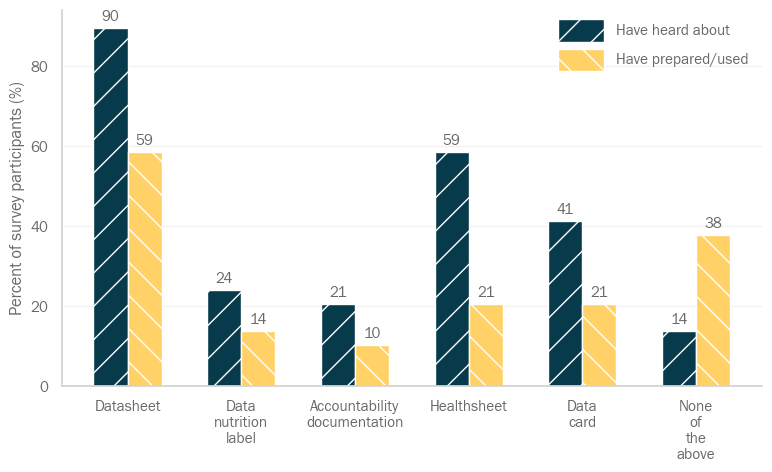

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
width = 0.3
x = np.arange(len(doc_options))
y_list = []
for label in labels_list:
    df_k2 = dict_df[label + " %"]
    y_list.append(list(df_k2["Total"].values))
labels = []
for option in doc_options:
    if len(option.split()) > 1:
        option = "\n".join(option.split())
    labels.append(option)
count = 0
for y in y_list:
    bars = ax.bar(
        x + width * count,
        y,
        width,
        color=colors[count],
        hatch=patterns[count],
        label=labels_list[count],
    )
    ax.bar_label(bars, fmt="%.f", padding=3, fontsize=11)
    count += 1

ax.set_xticks(x + width / 2, labels)
ax.set_ylabel("Percent of survey participants (%)", fontsize=12)
ax.set_axisbelow(True)
leg = ax.legend(
    loc="upper right", labelspacing=1, handlelength=3, facecolor="white", frameon=False
)
for patch in leg.get_patches():
    patch.set_height(16)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
fig.tight_layout()
fig.savefig("outputs/survey_prior_knowledge_use.png", dpi=200)

## Perceived ease of preparing dataset documentations by data generators

#### Asked after review of a randomly assigned dataset documentation template

#### Includes the data generator point of view of those who responsed "both data generators and consumers"

#### Preliminary data organization required for the analysis

In [9]:
# Question ids
dict_qid = {}

# data generators
dict_qid[role_labels[0]] = {}
dict_qid[role_labels[0]][doc_option_labels[0]] = [
    "Q30#1_1",
    "Q30#1_2",
    "Q30#1_3",
    "Q30#1_4",
    "Q30#1_5",
    "Q30#1_6",
    "Q30#1_7",
    "Q42",
]

dict_qid[role_labels[0]][doc_option_labels[1]] = [
    "Q118#1_1",
    "Q118#1_2",
    "Q118#1_3",
    "Q118#1_4",
    "Q118#1_5",
    "Q118#1_6",
    "Q118#1_7",
    "Q119",
]

dict_qid[role_labels[0]][doc_option_labels[2]] = [
    "Q142#1_1",
    "Q142#1_2",
    "Q142#1_3",
    "Q143",
]

dict_qid[role_labels[0]][doc_option_labels[3]] = [
    "Q70#1_1",
    "Q70#1_2",
    "Q70#1_3",
    "Q70#1_4",
    "Q70#1_5",
    "Q70#1_6",
    "Q70#1_7",
    "Q70#1_8",
    "Q70#1_9",
    "Q70#1_10",
    "Q70#1_11",
    "Q70#1_12",
    "Q70#1_13",
    "Q70#1_14",
    "Q71",
]
dict_qid[role_labels[0]][doc_option_labels[4]] = [
    "Q94#1_1",
    "Q94#1_2",
    "Q94#1_3",
    "Q94#1_4",
    "Q94#1_5",
    "Q94#1_6",
    "Q94#1_7",
    "Q94#1_8",
    "Q94#1_9",
    "Q94#1_10",
    "Q94#1_11",
    "Q94#1_12",
    "Q94#1_13",
    "Q94#1_14",
    "Q94#1_15",
    "Q94#1_16",
    "Q95",
]


# both - with data generators point of view responses
dict_qid[role_labels[2]] = {}
dict_qid[role_labels[2]][doc_option_labels[0]] = [
    "Q186#1_1",
    "Q186#1_2",
    "Q186#1_3",
    "Q186#1_4",
    "Q186#1_5",
    "Q186#1_6",
    "Q186#1_7",
    "Q187",
]

dict_qid[role_labels[2]][doc_option_labels[1]] = [
    "Q225#1_1",
    "Q225#1_2",
    "Q225#1_3",
    "Q225#1_4",
    "Q225#1_5",
    "Q225#1_6",
    "Q225#1_7",
    "Q226",
]
dict_qid[role_labels[2]][doc_option_labels[2]] = [
    "Q238#1_1",
    "Q238#1_2",
    "Q238#1_3",
    "Q239",
]

dict_qid[role_labels[2]][doc_option_labels[3]] = [
    "Q199#1_1",
    "Q199#1_2",
    "Q199#1_3",
    "Q199#1_4",
    "Q199#1_5",
    "Q199#1_6",
    "Q199#1_7",
    "Q199#1_8",
    "Q199#1_9",
    "Q199#1_10",
    "Q199#1_11",
    "Q199#1_12",
    "Q199#1_13",
    "Q199#1_14",
    "Q200",
]
dict_qid[role_labels[2]][doc_option_labels[4]] = [
    "Q212#1_1",
    "Q212#1_2",
    "Q212#1_3",
    "Q212#1_4",
    "Q212#1_5",
    "Q212#1_6",
    "Q212#1_7",
    "Q212#1_8",
    "Q212#1_9",
    "Q212#1_10",
    "Q212#1_11",
    "Q212#1_12",
    "Q212#1_13",
    "Q212#1_14",
    "Q212#1_15",
    "Q212#1_16",
    "Q213",
]


# documentation sections that are evaluated
dict_sections = {}
dict_sections[doc_option_labels[0]] = [
    "Motivation",
    "Composition",
    "Collection Process",
    "Preprocessing/cleaning/labeling",
    "Uses",
    "Distribution",
    "Maintenance",
    "Overall",
]


dict_sections[doc_option_labels[1]] = [
    "Metadata",
    "Just the Facts",
    "Collected (Why) – Use Cases",
    "Collected (What)",
    "Collected (How)",
    "Processed (How)",
    "Known Issues",
    "Overall",
]

dict_sections[doc_option_labels[2]] = [
    "Dataset Requirements Specification",
    "Dataset Design Document",
    "Dataset Testing Report",
    "Overall",
]

dict_sections[doc_option_labels[3]] = [
    "General information",
    "Dataset versioning",
    "Motivation",
    "Data Composition",
    "Devices and Contextual Attributes in Data Collection",
    "Challenge tests and confounding factors",
    "Collection and use of demographic information",
    "Pre-processing / de-identification",
    "Labeling and subjectivity of labeling",
    "Collection Process",
    "Accessibility in data collection",
    "Uses",
    "Dataset Distribution",
    "Maintenance",
    "Overall",
]

dict_sections[doc_option_labels[4]] = [
    "Summary",
    "Authorship",
    "Dataset Overview",
    "Example of Data Points",
    "Motivations & Intentions",
    "Access, Retention, & Wipeout",
    "Provenance",
    "Human and Other Sensitive Attributes",
    "Extended Use",
    "Transformations",
    "Annotations & Labeling",
    "Validation Types",
    "Sampling Methods",
    "Known Applications & Benchmarks",
    "Terms of Art",
    "Reflections on Data",
    "Overall",
]

# Ease evaluation scale
ease_prep_options = ["Very Difficult", "Difficult", "Neutral", "Easy", "Very Easy"]

#### Count how many have completed each of the dataset documentation evaluation

In [10]:
rows = []
for index, row in df_responses.iterrows():
    i = role_options.index(row[roleid])
    if i == 0 or i == 2:
        row_entry = []
        role = role_labels[i]
        row_entry.append(role)
        list_doc = []
        count_doc = 0
        for doc in dict_sections.keys():
            if type(row[dict_qid[role][doc][0]]) == str:
                row_entry.append(1)
                count_doc += 1
            else:
                row_entry.append(0)
        row_entry.append(count_doc)
        rows.append(row_entry)
df_ease_completed = pd.DataFrame(
    rows, columns=["Role"] + list(dict_sections.keys()) + ["Total"]
)
print(
    len(df_ease_completed),
    "participants completed the evaluation from the data generator's point of view",
)
print(
    "This includes",
    len(df_ease_completed[df_ease_completed["Role"] == "Data generator"]),
    "data generators",
)
print(
    "This includes", len(df_ease_completed[df_ease_completed["Role"] == "Both"]), "both"
)
print(
    len(df_ease_completed[df_ease_completed["Total"] > 1]),
    "participants evaluated more than one documentation approach",
)
print("This led to", df_ease_completed["Total"].sum(), "unique evaluations")
for doc in dict_sections.keys():
    print(doc, ":", df_ease_completed[doc].sum())

display(df_ease_completed)

15 participants completed the evaluation from the data generator's point of view
This includes 5 data generators
This includes 10 both
5 participants evaluated more than one documentation approach
This led to 24 unique evaluations
Datasheet : 5
Dataset Nutrition Label : 4
Accountability Documentation : 4
Healthsheet : 5
Data Card : 6


,Role,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Total
0,Both,0,0,0,0,1,1
1,Both,0,1,0,0,0,1
2,Data generator,1,0,0,0,0,1
3,Both,1,0,0,0,0,1
4,Both,0,0,0,1,0,1
5,Both,1,0,1,0,0,2
6,Both,0,0,1,1,0,2
7,Data generator,0,0,0,0,1,1
8,Data generator,0,0,0,1,0,1
9,Data generator,0,1,0,0,0,1


#### Section-wise ratings

In [11]:
ease_list = []
for doc in dict_sections.keys():
    i = 0
    for role, qid_list in dict_qid.items():
        for qid, section in zip(qid_list[doc], dict_sections[doc]):
            row = [doc, role, section]
            for option in ease_prep_options:
                count = len(
                    df_responses[
                        (df_responses[qid] == option)
                        & (df_responses[roleid] == role_options[i])
                    ]
                )
                row.append(count)
            ease_list.append(row)
        i = 2
df_ease = pd.DataFrame(
    ease_list, columns=["Documentation approach", "Role", "Section"] + ease_prep_options
)
df_ease["Total"] = df_ease[ease_prep_options].sum(axis=1)

ease_total_list = []
for doc in dict_sections.keys():
    for section in dict_sections[doc]:
        row = [doc, "Combined", section]
        for option in ease_prep_options + ["Total"]:
            count = 0
            for role in dict_qid.keys():
                count += df_ease[
                    (df_ease["Documentation approach"] == doc)
                    & (df_ease["Section"] == section)
                    & (df_ease["Role"] == role)
                ][option].values[0]
            row.append(count)
        ease_total_list.append(row)
df_ease_total = pd.DataFrame(
    ease_total_list,
    columns=["Documentation approach", "Role", "Section"]
    + ease_prep_options
    + ["Total"],
)
df_ease_total.to_excel("outputs/survey_ease_of_prep_evaluation_table.xlsx", index=False)
display(df_ease_total)

,Documentation approach,Role,Section,Very Difficult,Difficult,Neutral,Easy,Very Easy,Total
0,Datasheet,Combined,Motivation,0,1,0,3,1,5
1,Datasheet,Combined,Composition,0,1,0,3,1,5
2,Datasheet,Combined,Collection Process,0,0,1,3,1,5
3,Datasheet,Combined,Preprocessing/cleaning/labeling,0,0,0,4,1,5
4,Datasheet,Combined,Uses,0,0,0,4,1,5
5,Datasheet,Combined,Distribution,0,0,0,4,1,5
6,Datasheet,Combined,Maintenance,0,0,0,4,1,5
7,Datasheet,Combined,Overall,0,1,1,2,1,5
8,Dataset Nutrition Label,Combined,Metadata,0,2,0,2,0,4
9,Dataset Nutrition Label,Combined,Just the Facts,0,0,2,2,0,4


#### Analysis of overall ratings

In [12]:
df_overall = df_ease_total[df_ease_total["Section"] == "Overall"].copy()
display(df_overall)
total_ratings = df_overall["Total"].sum()
print("Total evaluations", total_ratings)
for rating in ease_prep_options:
    count = df_overall[rating].sum()
    print(rating, count, round(count / total_ratings * 100, 0), "%")

,Documentation approach,Role,Section,Very Difficult,Difficult,Neutral,Easy,Very Easy,Total
7,Datasheet,Combined,Overall,0,1,1,2,1,5
15,Dataset Nutrition Label,Combined,Overall,0,0,3,1,0,4
19,Accountability Documentation,Combined,Overall,0,2,2,0,0,4
34,Healthsheet,Combined,Overall,0,1,2,1,1,5
51,Data Card,Combined,Overall,1,2,2,1,0,6


Total evaluations 24
Very Difficult 1 4.0 %
Difficult 6 25.0 %
Neutral 10 42.0 %
Easy 5 21.0 %
Very Easy 2 8.0 %


## Perceived usefulness of a dataset documentations by data consumers

#### Asked after review of a randomly assigned dataset documentation template

#### Includes the data consumers point of view of and those who responsed "both data generators and consumers"

#### Preliminary data organization required for the analysis

In [13]:
doc_option_labels

['Datasheet',
 'Dataset Nutrition Label',
 'Accountability Documentation',
 'Healthsheet',
 'Data Card',
 'None of the above']

In [14]:
# Question ids
dict_qid = {}

# data consumers
dict_qid[role_labels[1]] = {}
dict_qid[role_labels[1]][doc_option_labels[0]] = [
    "Q56#1_1",
    "Q56#1_2",
    "Q56#1_3",
    "Q56#1_4",
    "Q56#1_5",
    "Q56#1_6",
    "Q56#1_7",
    "Q57",
]

dict_qid[role_labels[1]][doc_option_labels[1]] = [
    "Q130#1_1",
    "Q130#1_2",
    "Q130#1_3",
    "Q130#1_4",
    "Q130#1_5",
    "Q130#1_6",
    "Q130#1_7",
    "Q131",
]

dict_qid[role_labels[1]][doc_option_labels[2]] = [
    "Q154#1_1",
    "Q154#1_2",
    "Q154#1_3",
    "Q155",
]

dict_qid[role_labels[1]][doc_option_labels[3]] = [
    "Q82#1_1",
    "Q82#1_2",
    "Q82#1_3",
    "Q82#1_4",
    "Q82#1_5",
    "Q82#1_6",
    "Q82#1_7",
    "Q82#1_8",
    "Q82#1_9",
    "Q82#1_10",
    "Q82#1_11",
    "Q82#1_12",
    "Q82#1_13",
    "Q82#1_14",
    "Q83",
]
dict_qid[role_labels[1]][doc_option_labels[4]] = [
    "Q106#1_1",
    "Q106#1_2",
    "Q106#1_3",
    "Q106#1_4",
    "Q106#1_5",
    "Q106#1_6",
    "Q106#1_7",
    "Q106#1_8",
    "Q106#1_9",
    "Q106#1_10",
    "Q106#1_11",
    "Q106#1_12",
    "Q106#1_13",
    "Q106#1_14",
    "Q106#1_15",
    "Q106#1_16",
    "Q107",
]


# both - with data generators point of view responses
dict_qid[role_labels[2]] = {}
dict_qid[role_labels[2]][doc_option_labels[0]] = [
    "Q188#1_1",
    "Q188#1_2",
    "Q188#1_3",
    "Q188#1_4",
    "Q188#1_5",
    "Q188#1_6",
    "Q188#1_7",
    "Q189",
]

dict_qid[role_labels[2]][doc_option_labels[1]] = [
    "Q227#1_1",
    "Q227#1_2",
    "Q227#1_3",
    "Q227#1_4",
    "Q227#1_5",
    "Q227#1_6",
    "Q227#1_7",
    "Q228",
]
dict_qid[role_labels[2]][doc_option_labels[2]] = [
    "Q240#1_1",
    "Q240#1_2",
    "Q240#1_3",
    "Q241",
]


dict_qid[role_labels[2]][doc_option_labels[3]] = [
    "Q201#1_1",
    "Q201#1_2",
    "Q201#1_3",
    "Q201#1_4",
    "Q201#1_5",
    "Q201#1_6",
    "Q201#1_7",
    "Q201#1_8",
    "Q201#1_9",
    "Q201#1_10",
    "Q201#1_11",
    "Q201#1_12",
    "Q201#1_13",
    "Q201#1_14",
    "Q202",
]
dict_qid[role_labels[2]][doc_option_labels[4]] = [
    "Q214#1_1",
    "Q214#1_2",
    "Q214#1_3",
    "Q214#1_4",
    "Q214#1_5",
    "Q214#1_6",
    "Q214#1_7",
    "Q214#1_8",
    "Q214#1_9",
    "Q214#1_10",
    "Q214#1_11",
    "Q214#1_12",
    "Q214#1_13",
    "Q214#1_14",
    "Q214#1_15",
    "Q214#1_16",
    "Q215",
]

# Useful evaluation scale
usefulness_options = [
    "Not useful at all",
    "Not useful",
    "Neutral",
    "Useful",
    "Very useful",
]

#### Count how many have completed each of the dataset documentation evaluation

In [15]:
rows = []
for index, row in df_responses.iterrows():
    i = role_options.index(row[roleid])
    if i == 1 or i == 2:
        row_entry = []
        role = role_labels[i]
        row_entry.append(role)
        list_doc = []
        count_doc = 0
        for doc in dict_sections.keys():
            if type(row[dict_qid[role][doc][0]]) == str:
                list_doc.append(doc)
                row_entry.append(1)
                count_doc += 1
            else:
                row_entry.append(0)
        row_entry.append(count_doc)
        rows.append(row_entry)
df_useful_completed = pd.DataFrame(
    rows, columns=["Role"] + list(dict_sections.keys()) + ["Total"]
)
print(
    len(df_useful_completed),
    "participants completed the evaluation from the data consumers point of view",
)
print(
    "This includes",
    len(df_useful_completed[df_useful_completed["Role"] == "Data consumer"]),
    "data consumers",
)
print(
    "This includes",
    len(df_useful_completed[df_useful_completed["Role"] == "Both"]),
    "both",
)
print(
    len(df_useful_completed[df_useful_completed["Total"] > 1]),
    "participants evaluated more than one documentation approach",
)
print("This led to", df_useful_completed["Total"].sum(), "unique evaluations")
for doc in dict_sections.keys():
    print(doc, ":", df_useful_completed[doc].sum())

display(df_useful_completed)

24 participants completed the evaluation from the data consumers point of view
This includes 14 data consumers
This includes 10 both
10 participants evaluated more than one documentation approach
This led to 45 unique evaluations
Datasheet : 10
Dataset Nutrition Label : 7
Accountability Documentation : 11
Healthsheet : 7
Data Card : 10


,Role,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Total
0,Both,0,0,0,0,1,1
1,Both,0,1,0,0,0,1
2,Data consumer,1,1,1,1,1,5
3,Data consumer,1,0,0,0,1,2
4,Both,1,0,0,0,0,1
5,Both,0,0,0,1,0,1
6,Both,1,0,1,0,0,2
7,Both,0,0,1,1,0,2
8,Data consumer,1,0,0,0,0,1
9,Data consumer,0,1,0,0,0,1


#### Section-wise ratings

In [16]:
useful_list = []
for doc in dict_sections.keys():
    i = 1
    for role, qid_list in dict_qid.items():
        for qid, section in zip(qid_list[doc], dict_sections[doc]):
            row = [doc, role, section]
            for option in usefulness_options:
                count = len(
                    df_responses[
                        (df_responses[qid] == option)
                        & (df_responses[roleid] == role_options[i])
                    ]
                )
                row.append(count)
            useful_list.append(row)
        i = 2
df_useful = pd.DataFrame(
    useful_list,
    columns=["Documentation approach", "Role", "Section"] + usefulness_options,
)
df_useful["Total"] = df_useful[usefulness_options].sum(axis=1)

useful_total_list = []
for doc in dict_sections.keys():
    for section in dict_sections[doc]:
        row = [doc, "Combined", section]
        for option in usefulness_options + ["Total"]:
            count = 0
            for role in dict_qid.keys():
                count += df_useful[
                    (df_useful["Documentation approach"] == doc)
                    & (df_useful["Section"] == section)
                    & (df_useful["Role"] == role)
                ][option].values[0]
            row.append(count)
        useful_total_list.append(row)
df_useful_total = pd.DataFrame(
    useful_total_list,
    columns=["Documentation approach", "Role", "Section"]
    + usefulness_options
    + ["Total"],
)
df_useful_total.to_excel("outputs/survey_usefulness_evaluation_table.xlsx", index=False)
display(df_useful_total)

,Documentation approach,Role,Section,Not useful at all,Not useful,Neutral,Useful,Very useful,Total
0,Datasheet,Combined,Motivation,0,2,2,3,3,10
1,Datasheet,Combined,Composition,0,0,1,2,7,10
2,Datasheet,Combined,Collection Process,0,0,1,3,6,10
3,Datasheet,Combined,Preprocessing/cleaning/labeling,0,0,1,3,6,10
4,Datasheet,Combined,Uses,0,0,1,6,3,10
5,Datasheet,Combined,Distribution,0,0,2,6,2,10
6,Datasheet,Combined,Maintenance,0,0,1,4,5,10
7,Datasheet,Combined,Overall,0,1,0,7,2,10
8,Dataset Nutrition Label,Combined,Metadata,0,0,1,4,2,7
9,Dataset Nutrition Label,Combined,Just the Facts,0,0,1,6,0,7


#### Analysis of overall ratings

In [17]:
df_overall = df_useful_total[df_useful_total["Section"] == "Overall"].copy()
display(df_overall)
total_ratings = df_overall["Total"].sum()
print("Total evaluations", total_ratings)
for rating in usefulness_options:
    count = df_overall[rating].sum()
    print(rating, count, round(count / total_ratings * 100, 0), "%")

,Documentation approach,Role,Section,Not useful at all,Not useful,Neutral,Useful,Very useful,Total
7,Datasheet,Combined,Overall,0,1,0,7,2,10
15,Dataset Nutrition Label,Combined,Overall,0,1,1,4,1,7
19,Accountability Documentation,Combined,Overall,0,0,3,6,2,11
34,Healthsheet,Combined,Overall,0,0,0,5,2,7
51,Data Card,Combined,Overall,0,1,1,5,3,10


Total evaluations 45
Not useful at all 0 0.0 %
Not useful 3 7.0 %
Neutral 5 11.0 %
Useful 27 60.0 %
Very useful 10 22.0 %


## Combined plots ease/useful

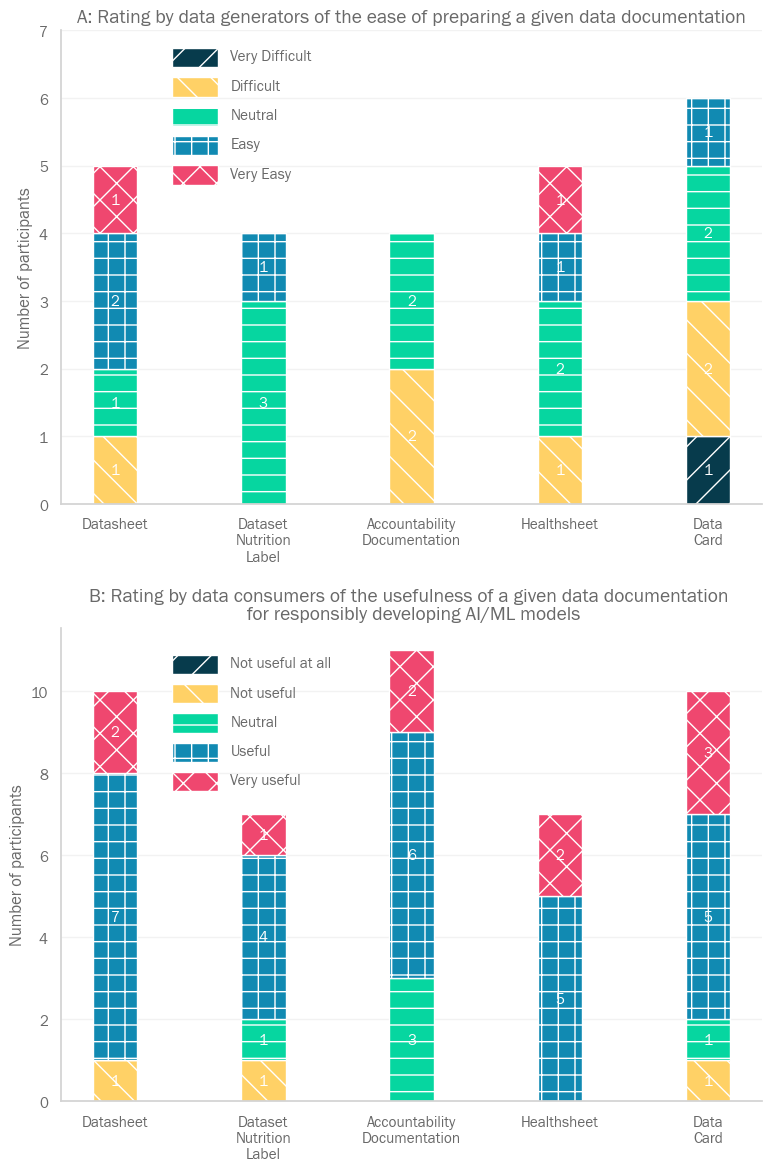

In [18]:
doc_options = dict_sections.keys()
labels = []
for option in doc_options:
    if len(option.split()) > 1:
        option = "\n".join(option.split())
    labels.append(option)

width = 0.3

fig, axs = plt.subplots(2, 1, figsize=(8, 12))
x = np.arange(len(labels))

# ease
df_ease_combined_overall = df_ease_total[
    (df_ease_total["Section"] == "Overall") & (df_ease_total["Role"] == "Combined")
]
ax = axs[0]
bottom = np.zeros(5)
count = 0
for option in ease_prep_options:
    y = df_ease_combined_overall[option]
    ax.bar(
        x,
        y,
        width,
        bottom=bottom,
        color=colors[count],
        hatch=patterns[count],
        label=option,
    )
    count += 1
    bottom = bottom + np.array(y)

for c in ax.containers:
    bar_labels = [int(a) if a else "" for a in c.datavalues]
    ax.bar_label(c, labels=bar_labels, label_type="center", fontsize=11, color="white")

ax.set_xticks(x, labels, fontsize=11)
ax.set_yticks(range(8), range(8), fontsize=11)
ax.set_ylabel("Number of participants", fontsize=12)
ax.set_axisbelow(True)
leg = ax.legend(
    loc=(0.15, 0.67), labelspacing=1, handlelength=3, facecolor="white", frameon=False
)
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
ax.set_title(
    "A: Rating by data generators of the ease of preparing a given data documentation",
    fontsize=14,
)

# useful
df_useful_combined_overall = df_useful_total[
    (df_useful_total["Section"] == "Overall") & (df_useful_total["Role"] == "Combined")
]
ax = axs[1]
bottom = np.zeros(5)
count = 0
for option in usefulness_options:
    y = df_useful_combined_overall[option]
    ax.bar(
        x,
        y,
        width,
        bottom=bottom,
        color=colors[count],
        hatch=patterns[count],
        label=option,
    )
    count += 1
    bottom = bottom + np.array(y)

for c in ax.containers:
    bar_labels = [int(a) if a else "" for a in c.datavalues]
    ax.bar_label(c, labels=bar_labels, label_type="center", fontsize=11, color="white")

ax.set_xticks(x, labels, fontsize=11)
ax.set_ylabel("Number of participants", fontsize=12)
ax.set_axisbelow(True)
leg = ax.legend(
    loc=(0.15, 0.65), labelspacing=1, handlelength=3, facecolor="white", frameon=False
)
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
ax.set_title(
    "B: Rating by data consumers of the usefulness of a given data documentation \n for responsibly developing AI/ML models",
    fontsize=14,
)

fig.tight_layout()
fig.savefig("outputs/survey_ease_useful.png", dpi=200)

## Section specific analysis ease

In [19]:
ease_col = [
    "Count rated 'Easy' or 'Very easy'",
    "Rated 'Easy' or 'Very easy' (%)",
    "Count not rated 'Easy' or 'Very easy'",
    "Not rated 'Easy' or 'Very easy' (%)",
    "Count rated 'Difficult' or 'Very Difficult'",
    "Rated 'Difficult' or 'Very Difficult' (%)",
    "Count neutral",
    "Neutral (%)",
]
df_ease_total[ease_col[0]] = df_ease_total["Easy"] + df_ease_total["Very Easy"]
df_ease_total[ease_col[1]] = (
    (df_ease_total["Easy"] + df_ease_total["Very Easy"]) / df_ease_total["Total"] * 100
)

df_ease_total[ease_col[2]] = (
    df_ease_total["Difficult"]
    + df_ease_total["Very Difficult"]
    + df_ease_total["Neutral"]
)

df_ease_total[ease_col[3]] = (
    (
        df_ease_total["Difficult"]
        + df_ease_total["Very Difficult"]
        + df_ease_total["Neutral"]
    )
    / df_ease_total["Total"]
    * 100
)

df_ease_total[ease_col[4]] = (
    df_ease_total["Difficult"] + df_ease_total["Very Difficult"]
)

df_ease_total[ease_col[5]] = (
    (df_ease_total["Difficult"] + df_ease_total["Very Difficult"])
    / df_ease_total["Total"]
    * 100
)

df_ease_total[ease_col[6]] = df_ease_total["Neutral"]
df_ease_total[ease_col[7]] = df_ease_total["Neutral"] / df_ease_total["Total"] * 100

### Overall Easy and Very Easy

In [20]:
df_ease_total_overall = df_ease_total[df_ease_total["Section"] == "Overall"].copy()
display(
    df_ease_total_overall[
        [
            "Documentation approach",
            "Section",
            "Total",
            ease_col[0],
            ease_col[1],
            ease_col[2],
            ease_col[3],
            ease_col[4],
            ease_col[5],
            ease_col[6],
            ease_col[7],
        ]
    ]
)

,Documentation approach,Section,Total,Count rated 'Easy' or 'Very easy',Rated 'Easy' or 'Very easy' (%),Count not rated 'Easy' or 'Very easy',Not rated 'Easy' or 'Very easy' (%),Count rated 'Difficult' or 'Very Difficult',Rated 'Difficult' or 'Very Difficult' (%),Count neutral,Neutral (%)
7,Datasheet,Overall,5,3,60.000000,2,40.000000,1,20.0,1,20.000000
15,Dataset Nutrition Label,Overall,4,1,25.000000,3,75.000000,0,0.0,3,75.000000
19,Accountability Documentation,Overall,4,0,0.000000,4,100.000000,2,50.0,2,50.000000
34,Healthsheet,Overall,5,2,40.000000,3,60.000000,1,20.0,2,40.000000
51,Data Card,Overall,6,1,16.666667,5,83.333333,3,50.0,2,33.333333


### Section-wise Easy and Very easy

In [21]:
display(
    df_ease_total[
        [
            "Documentation approach",
            "Section",
            "Total",
            ease_col[0],
            ease_col[1],
            ease_col[2],
            ease_col[3],
            ease_col[4],
            ease_col[5],
            ease_col[6],
            ease_col[7],
        ]
    ]
)

,Documentation approach,Section,Total,Count rated 'Easy' or 'Very easy',Rated 'Easy' or 'Very easy' (%),Count not rated 'Easy' or 'Very easy',Not rated 'Easy' or 'Very easy' (%),Count rated 'Difficult' or 'Very Difficult',Rated 'Difficult' or 'Very Difficult' (%),Count neutral,Neutral (%)
0,Datasheet,Motivation,5,4,80.000000,1,20.000000,1,20.000000,0,0.000000
1,Datasheet,Composition,5,4,80.000000,1,20.000000,1,20.000000,0,0.000000
2,Datasheet,Collection Process,5,4,80.000000,1,20.000000,0,0.000000,1,20.000000
3,Datasheet,Preprocessing/cleaning/labeling,5,5,100.000000,0,0.000000,0,0.000000,0,0.000000
4,Datasheet,Uses,5,5,100.000000,0,0.000000,0,0.000000,0,0.000000
5,Datasheet,Distribution,5,5,100.000000,0,0.000000,0,0.000000,0,0.000000
6,Datasheet,Maintenance,5,5,100.000000,0,0.000000,0,0.000000,0,0.000000
7,Datasheet,Overall,5,3,60.000000,2,40.000000,1,20.000000,1,20.000000
8,Dataset Nutrition Label,Metadata,4,2,50.000000,2,50.000000,2,50.000000,0,0.000000
9,Dataset Nutrition Label,Just the Facts,4,2,50.000000,2,50.000000,0,0.000000,2,50.000000


In [22]:
# section majority easy
df_ease_total_easy = df_ease_total[
    (df_ease_total["Section"] != "Overall") & (df_ease_total[ease_col[1]] >= 50)
].copy()

display(
    df_ease_total_easy[
        [
            "Documentation approach",
            "Section",
            "Total",
            ease_col[0],
            ease_col[1],
        ]
    ]
)

,Documentation approach,Section,Total,Count rated 'Easy' or 'Very easy',Rated 'Easy' or 'Very easy' (%)
0,Datasheet,Motivation,5,4,80.000000
1,Datasheet,Composition,5,4,80.000000
2,Datasheet,Collection Process,5,4,80.000000
3,Datasheet,Preprocessing/cleaning/labeling,5,5,100.000000
4,Datasheet,Uses,5,5,100.000000
5,Datasheet,Distribution,5,5,100.000000
6,Datasheet,Maintenance,5,5,100.000000
8,Dataset Nutrition Label,Metadata,4,2,50.000000
9,Dataset Nutrition Label,Just the Facts,4,2,50.000000
10,Dataset Nutrition Label,Collected (Why) – Use Cases,4,2,50.000000


In [23]:
# section difficult
df_ease_total_difficult = df_ease_total[
    (df_ease_total["Section"] != "Overall") & (df_ease_total[ease_col[5]] >= 50)
].copy()

display(
    df_ease_total_difficult[
        [
            "Documentation approach",
            "Section",
            "Total",
            ease_col[4],
            ease_col[5],
        ]
    ]
)

,Documentation approach,Section,Total,Count rated 'Difficult' or 'Very Difficult',Rated 'Difficult' or 'Very Difficult' (%)
8,Dataset Nutrition Label,Metadata,4,2,50.0
18,Accountability Documentation,Dataset Testing Report,4,2,50.0
40,Data Card,"Access, Retention, & Wipeout",6,3,50.0
41,Data Card,Provenance,6,3,50.0
43,Data Card,Extended Use,6,3,50.0
48,Data Card,Known Applications & Benchmarks,6,3,50.0
49,Data Card,Terms of Art,6,3,50.0
50,Data Card,Reflections on Data,6,3,50.0


## Section specific analysis useful

In [24]:
useful_col = [
    "Count rated 'Useful' or 'Very useful' ",
    "Rated 'Useful' or 'Very useful' (%)",
    "Count not rated 'Useful' or 'Very useful' ",
    "Not rated 'Useful' or 'Very useful' (%)",
    "Count rated 'Not useful' or 'Not useful at all' ",
    "Rated 'Not useful' or 'Not useful at all' (%)",
    "Count neutral (%)",
    "Neutral (%)",
]

df_useful_total[useful_col[0]] = (
    df_useful_total["Useful"] + df_useful_total["Very useful"]
)
df_useful_total[useful_col[1]] = (
    (df_useful_total["Useful"] + df_useful_total["Very useful"])
    / df_useful_total["Total"]
    * 100
)

df_useful_total[useful_col[2]] = (
    df_useful_total["Not useful"]
    + df_useful_total["Not useful at all"]
    + df_useful_total["Neutral"]
)
df_useful_total[useful_col[3]] = (
    (
        df_useful_total["Not useful"]
        + df_useful_total["Not useful at all"]
        + df_useful_total["Neutral"]
    )
    / df_useful_total["Total"]
    * 100
)

df_useful_total[useful_col[4]] = (
    df_useful_total["Not useful"] + df_useful_total["Not useful at all"]
)
df_useful_total[useful_col[5]] = (
    (df_useful_total["Not useful"] + df_useful_total["Not useful at all"])
    / df_useful_total["Total"]
    * 100
)

df_useful_total[useful_col[6]] = df_useful_total["Neutral"]
df_useful_total[useful_col[7]] = (
    df_useful_total["Neutral"] / df_useful_total["Total"] * 100
)

### Overall Useful and Very useful

In [25]:
df_useful_total_overall = df_useful_total[
    df_useful_total["Section"] == "Overall"
].copy()
display(
    df_useful_total_overall[
        [
            "Documentation approach",
            "Section",
            "Total",
            useful_col[0],
            useful_col[1],
            useful_col[2],
            useful_col[3],
            useful_col[4],
            useful_col[5],
            useful_col[6],
            useful_col[7],
        ]
    ]
)

,Documentation approach,Section,Total,Count rated 'Useful' or 'Very useful',Rated 'Useful' or 'Very useful' (%),Count not rated 'Useful' or 'Very useful',Not rated 'Useful' or 'Very useful' (%),Count rated 'Not useful' or 'Not useful at all',Rated 'Not useful' or 'Not useful at all' (%),Count neutral (%),Neutral (%)
7,Datasheet,Overall,10,9,90.000000,1,10.000000,1,10.000000,0,0.000000
15,Dataset Nutrition Label,Overall,7,5,71.428571,2,28.571429,1,14.285714,1,14.285714
19,Accountability Documentation,Overall,11,8,72.727273,3,27.272727,0,0.000000,3,27.272727
34,Healthsheet,Overall,7,7,100.000000,0,0.000000,0,0.000000,0,0.000000
51,Data Card,Overall,10,8,80.000000,2,20.000000,1,10.000000,1,10.000000


### Section-wise Useful and Very useful

In [26]:
display(
    df_useful_total[
        [
            "Documentation approach",
            "Section",
            "Total",
            useful_col[0],
            useful_col[1],
            useful_col[2],
            useful_col[3],
            useful_col[4],
            useful_col[5],
            useful_col[6],
            useful_col[7],
        ]
    ]
)

,Documentation approach,Section,Total,Count rated 'Useful' or 'Very useful',Rated 'Useful' or 'Very useful' (%),Count not rated 'Useful' or 'Very useful',Not rated 'Useful' or 'Very useful' (%),Count rated 'Not useful' or 'Not useful at all',Rated 'Not useful' or 'Not useful at all' (%),Count neutral (%),Neutral (%)
0,Datasheet,Motivation,10,6,60.000000,4,40.000000,2,20.000000,2,20.000000
1,Datasheet,Composition,10,9,90.000000,1,10.000000,0,0.000000,1,10.000000
2,Datasheet,Collection Process,10,9,90.000000,1,10.000000,0,0.000000,1,10.000000
3,Datasheet,Preprocessing/cleaning/labeling,10,9,90.000000,1,10.000000,0,0.000000,1,10.000000
4,Datasheet,Uses,10,9,90.000000,1,10.000000,0,0.000000,1,10.000000
5,Datasheet,Distribution,10,8,80.000000,2,20.000000,0,0.000000,2,20.000000
6,Datasheet,Maintenance,10,9,90.000000,1,10.000000,0,0.000000,1,10.000000
7,Datasheet,Overall,10,9,90.000000,1,10.000000,1,10.000000,0,0.000000
8,Dataset Nutrition Label,Metadata,7,6,85.714286,1,14.285714,0,0.000000,1,14.285714
9,Dataset Nutrition Label,Just the Facts,7,6,85.714286,1,14.285714,0,0.000000,1,14.285714


In [27]:
# section not majority useful
df_useful_total_useful = df_useful_total[
    (df_useful_total["Section"] != "Overall") & (df_useful_total[useful_col[1]] < 50)
].copy()

display(
    df_useful_total_useful[
        ["Documentation approach", "Section", "Total", useful_col[0], useful_col[1]]
    ]
)

,Documentation approach,Section,Total,Count rated 'Useful' or 'Very useful',Rated 'Useful' or 'Very useful' (%)
18,Accountability Documentation,Dataset Testing Report,11,5,45.454545
22,Healthsheet,Motivation,7,3,42.857143
49,Data Card,Terms of Art,10,3,30.000000
50,Data Card,Reflections on Data,10,4,40.000000


## Missing information that should be added to a documentation

In [28]:
# Question ids
dict_qid_missing = {}

both_generator = role_labels[2] + "-" + role_labels[0]
both_consumer = role_labels[2] + "-" + role_labels[1]

role_labels_sp = []
role_labels_sp.append(role_labels[0])
role_labels_sp.append(role_labels[1])
role_labels_sp.append(both_generator)
role_labels_sp.append(both_consumer)

# Datasheet
dict_qid_missing[doc_option_labels[0]] = {}
dict_qid_missing[doc_option_labels[0]][role_labels_sp[0]] = ["Q43"]

dict_qid_missing[doc_option_labels[0]][role_labels_sp[1]] = ["Q58"]

dict_qid_missing[doc_option_labels[0]][role_labels_sp[2]] = ["Q188"]

dict_qid_missing[doc_option_labels[0]][role_labels_sp[3]] = ["Q190"]

# Dataset Nutrition Label
dict_qid_missing[doc_option_labels[1]] = {}
dict_qid_missing[doc_option_labels[1]][role_labels_sp[0]] = ["Q120"]

dict_qid_missing[doc_option_labels[1]][role_labels_sp[1]] = ["Q132"]

dict_qid_missing[doc_option_labels[1]][role_labels_sp[2]] = ["Q227"]

dict_qid_missing[doc_option_labels[1]][role_labels_sp[3]] = ["Q229"]

# Accountability Documentation
dict_qid_missing[doc_option_labels[2]] = {}
dict_qid_missing[doc_option_labels[2]][role_labels_sp[0]] = ["Q144"]

dict_qid_missing[doc_option_labels[2]][role_labels_sp[1]] = ["Q156"]

dict_qid_missing[doc_option_labels[2]][role_labels_sp[2]] = ["Q240"]

dict_qid_missing[doc_option_labels[2]][role_labels_sp[3]] = ["Q242"]

# Healthsheet
dict_qid_missing[doc_option_labels[3]] = {}
dict_qid_missing[doc_option_labels[3]][role_labels_sp[0]] = ["Q72"]

dict_qid_missing[doc_option_labels[3]][role_labels_sp[1]] = ["Q84"]

dict_qid_missing[doc_option_labels[3]][role_labels_sp[2]] = ["Q201"]

dict_qid_missing[doc_option_labels[3]][role_labels_sp[3]] = ["Q203"]

# Data Card
dict_qid_missing[doc_option_labels[4]] = {}
dict_qid_missing[doc_option_labels[4]][role_labels_sp[0]] = ["Q96"]

dict_qid_missing[doc_option_labels[4]][role_labels_sp[1]] = ["Q108"]

dict_qid_missing[doc_option_labels[4]][role_labels_sp[2]] = ["Q214"]

dict_qid_missing[doc_option_labels[4]][role_labels_sp[3]] = ["Q216"]

In [29]:
rows = []
for index, row in df_responses.iterrows():
    i = role_options.index(row[roleid])
    row_entry = []
    ind = []
    if i == 2:
        ind = [i, i+1]
    else:
        ind = [i]
    for i in ind:
        role = role_labels_sp[i]
        row_entry.append(role)
        for doc in dict_sections.keys():
            missing_comment = row[dict_qid_missing[doc][role][0]]
            if type(missing_comment) == str:
                rows.append([doc, role, missing_comment])

df_missing = pd.DataFrame(rows, columns=["Documentation", "Role", "Missing comment"])
df_missing = df_missing.sort_values(by='Documentation')
df_missing.to_excel("outputs/survey_suggestions_of_missing_information.xlsx", index=False)
display(df_missing)

,Documentation,Role,Missing comment
13,Accountability Documentation,Data consumer,References or bibliography to related work for...
3,Accountability Documentation,Both-Data generator,"data transparency essentials, demographics, in..."
5,Accountability Documentation,Both-Data consumer,"Depending on the nature of the data, one shoul..."
15,Accountability Documentation,Both-Data generator,- Known Biases and Bias mitigation strategies\...
21,Data Card,Both-Data consumer,Social Determinants of Health.
20,Data Card,Both-Data generator,It is notable that this is case by case. Work...
18,Data Card,Both-Data consumer,- Generalizability and Limitations: Discuss th...
16,Data Card,Both-Data generator,Some potential extra info could be:\n\n- Infor...
12,Data Card,Data generator,n/s
26,Data Card,Both-Data generator,preferable way to cite it (i.e published paper)


## Additional comments

In [30]:
# Question ids
dict_qid_comment = {}

# Datasheet
dict_qid_comment[doc_option_labels[0]] = {}
dict_qid_comment[doc_option_labels[0]][role_labels[0]] = ["Q45"]

dict_qid_comment[doc_option_labels[0]][role_labels[1]] = ["Q59"]

dict_qid_comment[doc_option_labels[0]][role_labels[2]] = ["Q189.1"]

# Dataset Nutrition Label
dict_qid_comment[doc_option_labels[1]] = {}
dict_qid_comment[doc_option_labels[1]][role_labels[0]] = ["Q121"]

dict_qid_comment[doc_option_labels[1]][role_labels[1]] = ["Q133"]

dict_qid_comment[doc_option_labels[1]][role_labels[2]] = ["Q228.1"]

# Accountability Documentation
dict_qid_comment[doc_option_labels[2]] = {}
dict_qid_comment[doc_option_labels[2]][role_labels[0]] = ["Q145"]

dict_qid_comment[doc_option_labels[2]][role_labels[1]] = ["Q157"]

dict_qid_comment[doc_option_labels[2]][role_labels[2]] = ["Q241.1"]

# Healthsheet
dict_qid_comment[doc_option_labels[3]] = {}
dict_qid_comment[doc_option_labels[3]][role_labels[0]] = ["Q73"]

dict_qid_comment[doc_option_labels[3]][role_labels[1]] = ["Q85"]  

dict_qid_comment[doc_option_labels[3]][role_labels[2]] = ["Q202.1"]


# Data Card
dict_qid_comment[doc_option_labels[4]] = {}
dict_qid_comment[doc_option_labels[4]][role_labels[0]] = ["Q97"]

dict_qid_comment[doc_option_labels[4]][role_labels[1]] = ["Q109"]

dict_qid_comment[doc_option_labels[4]][role_labels[2]] = ["Q215.1"]

In [31]:
rows = []
for index, row in df_responses.iterrows():
    i = role_options.index(row[roleid])
    row_entry = []
    role = role_labels[i]
    row_entry.append(role)
    for doc in dict_sections.keys():
        additional_comment = row[dict_qid_comment[doc][role][0]]
        if type(additional_comment) == str:
            rows.append([doc, role, additional_comment])

df_comment = pd.DataFrame(rows, columns=["Documentation", "Role", "Additional comment"])
df_comment = df_comment.sort_values(by='Documentation')
df_comment.to_excel("outputs/survey_additional_comments.xlsx", index=False)
display(df_comment)

,Documentation,Role,Additional comment
0,Accountability Documentation,Both,Data privacy is of utmost importance while gat...
2,Accountability Documentation,Data consumer,The document is good and covers a lot of the t...
3,Dataset Nutrition Label,Both,The dataset nutrition label is comprehensive b...
5,Dataset Nutrition Label,Both,It seems less useful than the data card.
1,Healthsheet,Data generator,I found the healthsheet very interesting and h...
4,Healthsheet,Both,The healthsheet is comprehensive but could be ...
6,Healthsheet,Both,It seems more difficult to collect
